# DS8004: Lab8 exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression

import pandas as pd
pd.__version__

'1.5.3'

In [4]:
df_train = pd.read_csv("boston_housing_train.csv")
df_test = pd.read_csv("boston_housing_test.csv")

In [7]:
df_train.shape

(404, 14)

In [11]:
y_train = np.array(df_train['label'])
x_train = df_train.drop('label', axis=1).to_numpy()

y_test = np.array(df_test['label'])
x_test = df_test.drop('label', axis=1).to_numpy()

In [12]:
clf= LinearRegression()

In [13]:
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
pred=clf.predict(x_test)

In [15]:
sklearn.metrics.mean_absolute_error(pred, y_test)

3.4641858124067277

In [16]:
np.mean(y_test),np.std(y_test)

(23.07843137254902, 9.123806690181466)

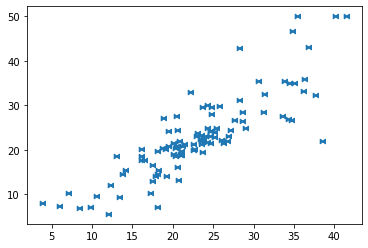

In [17]:
plt.scatter(pred, y_test, marker=r'$\bowtie$',
            label="Pred")
plt.show()

In [18]:
idx = np.random.randint(x_train.shape[0], size=7)
# idx
print(x_train[idx,:5])

[[1.09590e-01 0.00000e+00 1.19300e+01 0.00000e+00 5.73000e-01]
 [3.11300e-02 0.00000e+00 4.39000e+00 0.00000e+00 4.42000e-01]
 [3.76619e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.79000e-01]
 [1.78667e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.71000e-01]
 [1.35540e-01 1.25000e+01 6.07000e+00 0.00000e+00 4.09000e-01]
 [1.75050e-01 0.00000e+00 5.96000e+00 0.00000e+00 4.99000e-01]
 [7.95000e-02 6.00000e+01 1.69000e+00 0.00000e+00 4.11000e-01]]


In [19]:
idx = np.random.randint(x_train.shape[0], size=404)
# idx
len(list(set(idx)))

256

In [20]:
x_trainQ= x_train[idx,:]
y_trainQ= y_train[idx]

clf=LinearRegression()
clf.fit(x_trainQ, y_trainQ)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
clfList=[]
clfList.append(clf)

### Task 1: Bagging

* Create 10 different classifier by sampling the X_TRAIN, BOSTON HOUSE PRICE
* Apply your ensembled learners to test data 

In [22]:
# TASK -1 code here
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

L = 10
N = 404

clf = LinearRegression()
maeList = []

for l in range(L):
    
    idx = np.random.randint(x_train.shape[0], size=404)
    
    x_trainQ = x_train[idx, :]
    y_trainQ = y_train[idx]
    
    clf.fit(x_trainQ, y_trainQ)
    pred = clf.predict(x_test)
    
    MAE = mean_absolute_error(pred, y_test)
    maeList.append(MAE)
    
print('Average test data MAE: %.2f' % np.mean(maeList))

Average test data MAE: 3.41


### Task 2: Adaboost

* N: the number of examples, 500
* F: number of feature: 15
* L: the number of learners, 10
* $p_{j}^{t}= $  denotes the probability that the instance $pair (x_{t} , r_{t})$ is drawn to train the j-th base-learner.
* Initial condition $p_{1}^{t}=$  1/N

In [23]:
# create a dataset
import numpy as np
from sklearn.datasets import make_classification
N= 500
F= 15
X,y= make_classification(N,  n_features=F, flip_y=0.50)

In [24]:
# num pos , num neg instances
sum(y==1),sum(y==0), 

(257, 243)

In [25]:
prob=np.repeat(1/N,N)

In [26]:
prob[:5]

array([0.002, 0.002, 0.002, 0.002, 0.002])

In [27]:
idx=np.random.choice(N, N, p=prob)
len(idx)

500

In [28]:
len(set(idx))

316

In [29]:
idx=list(set(idx))

In [30]:
Xj=X[idx,:]
yj=y[idx]

In [31]:
Xj.shape

(316, 15)

In [32]:
yj.shape

(316,)

In [33]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [34]:
clf=LogisticRegression(solver='lbfgs')
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
print(sum(clf.predict(X) == y),len(y))
sum(clf.predict(X) == y)/len(y)

372 500


0.744

In [36]:
# Succesfully classified instances
suc=clf.predict(X) == y
suc[:10]

array([False,  True,  True, False,  True, False,  True, False,  True,
       False])

In [37]:
list(zip(prob[:10], suc[:10]))

[(0.002, False),
 (0.002, True),
 (0.002, True),
 (0.002, False),
 (0.002, True),
 (0.002, False),
 (0.002, True),
 (0.002, False),
 (0.002, True),
 (0.002, False)]

#### Adaboost Implementation

In [38]:
# Adaboost
prob=np.repeat(1/N,N)
B = []
clfList = []
for j in range(L):
    idx = np.random.choice(N, N, p=prob)
    Xj = X[idx]
    yj = y[idx]
    clf = LogisticRegression(solver='lbfgs')
    clf.fit(Xj, yj)
    preds = clf.predict(X)
    E = sum(prob * (preds != y))
    if E > 0.5:
        break
    clfList.append(clf)
    Bj = E / (1-E)
    B.append(Bj)
    
    prob[np.where(preds == y)] *= Bj
    prob /= sum(prob)

In [39]:
# Testing
def make_prediction(x):
    predictions = []
    for clf in clfList:
        predictions.append(clf.predict_proba(x.reshape(1, -1)).flatten())
    return np.argmax(np.sum(np.array(predictions) * np.log(1/np.array(B)).reshape(-1,1), axis=0))

In [40]:
preds = [make_prediction(x) for x in X]

In [41]:
sum(preds == y)/500

0.736